# Exploratory data Analysis on Titanic Dataset

*Importing required Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

### Step1: Data Cleaning and Imputation

#### Load and Check data

In [2]:
titanic=pd.read_csv('Titanic-Train-Data.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 2: Check the Missing Values of Columns

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Step 3: Perform Feature Engineering

#### Imputation on embarked and Age Columns

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [33]:
titanic=pd.read_csv('Titanic-Train-Data.csv')
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [36]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
#replace nan with zeroes
titanic['Embarked']=titanic['Embarked'].fillna(0)


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Title Extraction

In [40]:
def title(col):
    x=col.split('.')
    y=x[0].split(',')
    return y[1]
Title_Extraction = titanic['Name'].apply(title)
Title_Extraction

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Name, Length: 891, dtype: object

#### Ticket First Letters


In [60]:
l=[]
for i in titanic['Ticket']:
    j=i[0]
    l.append(j)
l

['A',
 'P',
 'S',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '2',
 'P',
 '1',
 'A',
 '3',
 '3',
 '2',
 '3',
 '2',
 '3',
 '2',
 '2',
 '2',
 '3',
 '1',
 '3',
 '3',
 '2',
 '1',
 '3',
 '3',
 'P',
 'P',
 '3',
 'C',
 'P',
 '1',
 '2',
 'A',
 '3',
 '2',
 '7',
 '1',
 '3',
 'S',
 '3',
 'S',
 '3',
 '1',
 '2',
 '3',
 '3',
 'A',
 'P',
 '2',
 '1',
 '1',
 'C',
 '2',
 'C',
 'C',
 '2',
 '1',
 '3',
 '3',
 'P',
 '2',
 'C',
 'S',
 '3',
 '3',
 'C',
 'C',
 'S',
 '2',
 '1',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 'S',
 '3',
 'W',
 'S',
 '1',
 '3',
 '3',
 '3',
 'W',
 'C',
 '3',
 '3',
 'P',
 'P',
 '2',
 '2',
 '3',
 '3',
 '3',
 '7',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '2',
 '3',
 '4',
 '2',
 'S',
 '3',
 '1',
 'P',
 '3',
 'S',
 'A',
 '2',
 '2',
 '3',
 '2',
 '3',
 'C',
 '2',
 '3',
 '3',
 'S',
 'A',
 '2',
 'C',
 'S',
 '1',
 '1',
 '7',
 'P',
 '2',
 '3',
 'S',
 '3',
 '2',
 'C',
 '3',
 'W',
 '2',
 '2',
 'S',
 '1',
 'A',
 'A',
 'F',
 'P',
 '3',
 'S',
 '3',
 'C',
 '3',
 'C',
 '3',
 '3',
 '3',
 '3',
 '1'

#### Cabin First Letters

In [5]:
c = titanic.dropna(subset=['Cabin'])
l=[]
for i in c['Cabin']:
    l.append(i[0])
print(l)
        

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D', 'B', 'C', 'B', 'C', 'F', 'F', 'C', 'E', 'A', 'D', 'D', 'C', 'B', 'E', 'D', 'F', 'D', 'C', 'B', 'F', 'C', 'E', 'B', 'A', 'C', 'F', 'A', 'F', 'B', 'B', 'G', 'A', 'D', 'D', 'C', 'C', 'C', 'D', 'G', 'C', 'B', 'E', 'B', 'C', 'C', 'C', 'D', 'A', 'B', 'D', 'C', 'C', 'B', 'E', 'C', 'C', 'E', 'C', 'B', 'C', 'E', 'C', 'D', 'B', 'C', 'C', 'C', 'E', 'T', 'F', 'C', 'F', 'C', 'E', 'D', 'B', 'E', 'C', 'B', 'D', 'G', 'C', 'E', 'C', 'E', 'B', 'C', 'A', 'C', 'C', 'C', 'E', 'D', 'E', 'E', 'D', 'A', 'B', 'C', 'B', 'C', 'D', 'C', 'B', 'C', 'E', 'D', 'F', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'A', 'E', 'C', 'E', 'E', 'C', 'A', 'E', 'B', 'D', 'A', 'C', 'F', 'D', 'D', 'D', 'A', 'B', 'B', 'D', 'A', 'D', 'E', 'C', 'B', 'B', 'D', 'B', 'B', 'C', 'F', 'C', 'E', 'E', 'C', 'C', 'C', 'F', 'C', 'E', 'E', 'B', 'B', 'D', 'C', 'B', 'B', 'D', 'E', 'B', 'B', 'D', 'E', 'F', 'B', 'B', 'D', 'B', 'D', 'B', 'A', 'E', 'B', 'B', 'E', 'B', 'E', 'C', 'C', 'D', 'E', 'D', 'A', 'D',

#### Encoding Sex Column

In [88]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Sex' column 
encoder_df = pd.DataFrame(encoder.fit_transform(titanic[['Sex']]).toarray())

final=encoder_df.join(titanic['Sex'])
final


,0,1,Sex
0,0.0,1.0,male
1,1.0,0.0,female
2,1.0,0.0,female
3,1.0,0.0,female
4,0.0,1.0,male
...,...,...,...
886,0.0,1.0,male
887,1.0,0.0,female
888,1.0,0.0,female
889,0.0,1.0,male


#### Family Size

In [89]:
FamilySize= titanic['SibSp']+titanic['Parch']
FamilySize

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

#### One Hot Encoding For all Categorical Variables

Embarked, Sex columns are Categorical

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [93]:
from sklearn.preprocessing import OneHotEncoder
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Embarked' column 
encoder_df = pd.DataFrame(encoder.fit_transform(embark).toarray())

final=encoder_df.join(embark)
final

,0,1,2,3,4,5,C,Q,S
0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1
1,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0
2,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1
3,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1
4,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1
887,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1
888,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1
889,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0


### Step 4: Data Visualization

#### Finding NAN Values using heat map

<AxesSubplot:>

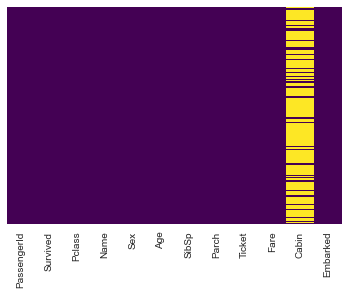

In [96]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Plot Sex vs Age  using Bar Graph

<AxesSubplot:xlabel='Sex', ylabel='Age'>

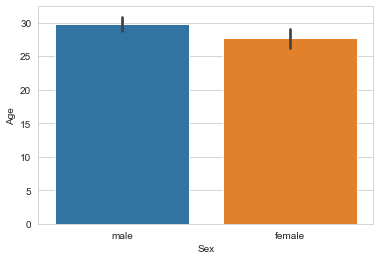

In [97]:
sns.barplot(x='Sex', y='Age', data=titanic)


#### Plot Sex vs Age vs Pclass using Bar Plot

<AxesSubplot:xlabel='Sex', ylabel='Age'>

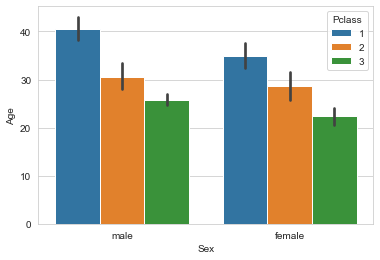

In [99]:
sns.barplot(x='Sex', y='Age',hue='Pclass', data=titanic)

#### Plot Sex vs Age vs Pclass using Violin Plot

<AxesSubplot:xlabel='Sex', ylabel='Age'>

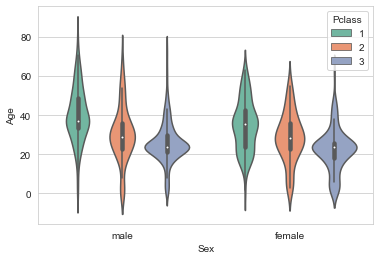

In [100]:
sns.violinplot(x='Sex',y='Age',hue='Pclass',data=titanic,palette='Set2')

#### Classifying Age using Distplot 

C:\Users\ALISHA ANJUM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

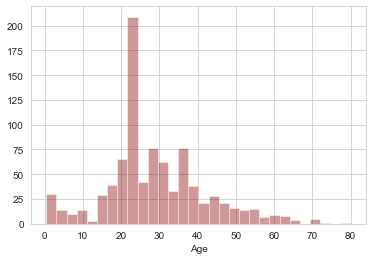

In [102]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

#### Plot Survived vs Age vs Pclass using BarPlot

<AxesSubplot:xlabel='Survived', ylabel='Age'>

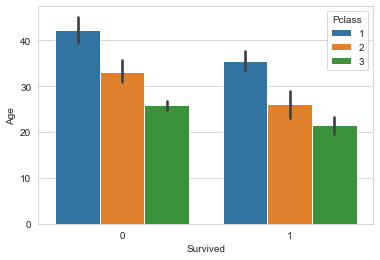

In [103]:
sns.barplot(x='Survived', y='Age',hue='Pclass', data=titanic)